## Gaussian Process Tests

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys

plt.style.use("bmh")
sys.path.append("../src/")
from kernels import ExponentiatedQuadraticKernel
from gaussian_process import GaussianProcess

In [6]:
np.random.seed(42)
T_train = np.sort(5 * np.random.rand(10), axis=0)
Y_train = np.sin(T_train).ravel()

T_test = np.arange(0, 5, 0.1)

gp = GaussianProcess(kernel=ExponentiatedQuadraticKernel, theta=[20, 2])

gp.fit(T_train, Y_train)
Y_pred_mean, Y_pred_covariance = gp.predict(T_test)

/var/folders/94/mh6g2gbj3bl342zd3jjfff0c0000gn/T/ipykernel_8380/3508224230.py:4: RuntimeWarning: invalid value encountered in sqrt
  plt.fill_between(T_test.ravel(), Y_pred_mean - np.sqrt(np.diag(Y_pred_covariance)),
/var/folders/94/mh6g2gbj3bl342zd3jjfff0c0000gn/T/ipykernel_8380/3508224230.py:5: RuntimeWarning: invalid value encountered in sqrt
  Y_pred_mean + np.sqrt(np.diag(Y_pred_covariance)), color='blue', alpha=0.2, label='Confidence Interval')


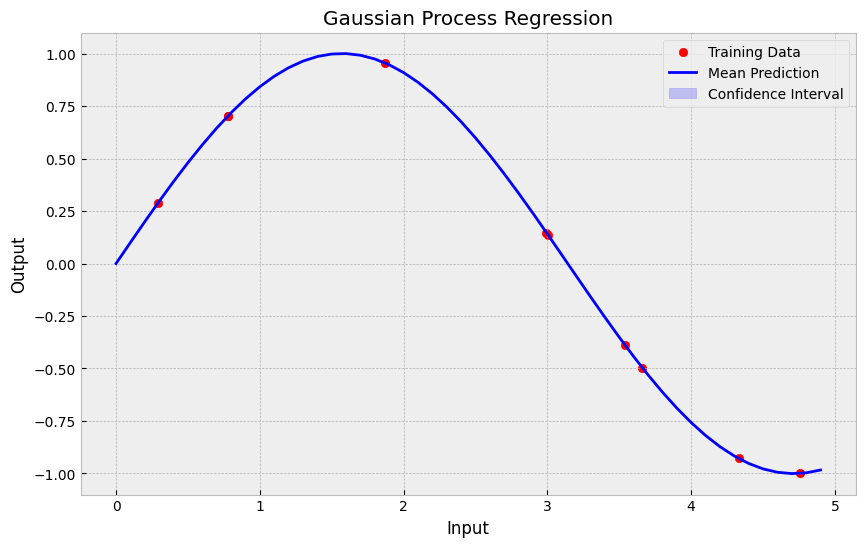

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(T_train, Y_train, c='red', label='Training Data')
plt.plot(T_test, Y_pred_mean, label='Mean Prediction', color='blue')
plt.fill_between(T_test.ravel(), Y_pred_mean - np.sqrt(np.diag(Y_pred_covariance)),
                 Y_pred_mean + np.sqrt(np.diag(Y_pred_covariance)), color='blue', alpha=0.2, label='Confidence Interval')
plt.title('Gaussian Process Regression')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.show()